# Probabilité

## Quelques aspects techniques avant de commencer

Il est très important de faire tourner la section ci-dessous, même si d'un point de vue pratique elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.



In [2]:
# library utilisée pour faire le graphique
# install.packages("ggplot2") # installation, à faire une seule fois
library(ggplot2) # chargement

# couleur pour le graphique
darkred  = "#8B0000"   


## Définir l'espace des probabilités


Une distribution de probabilité peut être considérée comme une construction formelle qui capture l'état de croyance d'un agent face à la réalisation d'un certain événement. Plus concrètement, une distribution de probabilité attribue des valeurs numériques (typiquement entre 0 et 1) à un certain nombre d'événements différents, c'est-à-dire à différents états dans lesquels le monde pourrait être. Ces valeurs numériques peuvent être interprétées comme le poids de la croyance que l'agent attribue à chaque événement : plus le nombre attribué à un événement est élevé, plus l'agent considère cet état du monde comme probable.

Nous pouvons définir l'espace des probabilités comme un ensemble $(\Omega, F, P)$

* **$\Omega$ -- Univers**: L'univers est l'espace d'échantillonnage, il contient tous les états possibles d'une expérience aléatoire. Les éléments contenus dans l'univers sont les issues (*outcomes*) et sont typiquement notés $\omega$.  Donc, $\omega_1, \omega_2, \ldots \in \Omega$. Par exemple, si vous lancez un dé à six faces, l'univers est $\Omega = \{ 1, 2, 3, 4, 5, 6 \} $, et la première des issues possibles est $\omega_1 = 1$.
  
* **$F$ -- L'espace des événements**: L'espace des événements contient des événements $E$. Un événement est un sous-ensemble d'issues tirées de l'univers $\Omega$. Quand un événement est constitué d’un seul élément, on dit que c'est un *événement élémentaire*. Par exemple, si vous lancez un dé à six faces, vous pouvez calculer la probabilité d'obtenir un nombre pair, dans ce cas l'événement est $E = \{2,4,6\}$. Pour calculer la probabilité d'obtenir un nombre spécifique comme 6, dans ce cas l'événement élémentaire est $E = \{6\}$.


* **$P$ -- Probabilité**: La probabilité est une fonction qui assigne une valeur numérique à chaque événement : $P(E) = x$.


La probabilité suit les trois axiomes suivants (Kolmogorov, 1956) :

* $0 \leq P(E) \leq 1$ \
La probabilité est une valeur numérique non négative qui varie entre 0 et 1
  
* $P(\Omega) = 1$ \
La somme de la probabilité de toutes les issues possibles dans l'univers est égale à 1

  
* $P(E_1 \cup E_2 \cup E_3 \cup \ldots) = P(E_1) + P(E_2) + P(E_3) + \ldots$ \
Lorsque $E_1, E_2, E_3, \ldots$ sont mutuellement exclusifs, la probabilité que l'un ou l'autre se produise est égale à la somme de leurs probabilités individuelles


La probabilité peut donc être conçue comme le rapport du nombre de cas favorables à la réalisation d’un événement au nombre total de cas possibles. Dans l'exemple du dé, la probabilité d'obtenir un nombre pair correspond à $3/6 = 0.5$ tandis que la probabilité d'obtenir le nombre 6 correspond à $1/6 = 0.1667$. Chaque événement $E$ est associé à une probabilité $P(E)$ qui varie entre 0 et 1.




## La variable aléatoire

La variable aléatoire est un concept fondamental en statistique qui fait le lien entre la probabilité théorique et les données du monde réel. Dans un context de psychologie expériementale nous mesurons des données comme des mouvements oculaires ou des choix. Typiquement, on considère que ces données (notée comme $x$) sont généres par une variable aléatoire (notée comme $X$). La valeur de la variable aléatoire n'est pas directement observable ; nous n'avons accès qu'aux réalisations de cette variable à travers les données mesurées.


Formellement, la variable aléatoire $X$ est une fonction de l'espace d'échantillonnage $\Omega$ des issues possibles $\omega$ vers le système des nombres réels $\mathbb{R}$ :

$$X : \Omega \to \mathbb{R}$$

La variable aléatoire associe à chaque issue $\omega$ un nombre : $X(\omega) = x, \omega \in \Omega$. Cette valuer numerique peut être considéré comme un nombre qui capture un aspect pertinent de ce qui est en fait une réalité beaucoup plus complexe.


Ses valeurs sont déterminées par le résultat d’une expérience. Par "aléatoire", nous ne voulons pas dire totalement imprévisible. Un processus aléatoire est simplement un processus dont le résultat ne peut pas être parfaitement connu à l'avance (il peut néanmoins être assez prévisible). Ainsi, pour un lancer de dé, nous pouvons créer une variable aléatoire $X$ qui prend une valeur de 1 si le dé tombe sur 1, de 2 s'il tombe sur 2, et ansi de suite. Comme le lancer de dé ne peut produire qu'un nombre défini d'événements (dans ce cas six), $X$ est une variable aléatoire discrète.

En termes de notation, on utilise typiquement les conventions suivantes :

* la variable aléatoire est notée avec une majuscule $X$ et la valeur numérique avec une minuscule $x$,
* la probabilité que la variable aléatoire ait une certaine valeur numérique est notée $P(X = x)$ -- cela correspond à la version abrégée de la version plus précise $P(\{\omega \in \Omega : X(\omega) = x\})$,
* la probabilité que la variable aléatoire prenne un valeur numérique plus grande ou égale à un certain seuil $x$ est notée $P(X≤x)$.


## Deux perspectives sur la probabilité

Il y deux manière différentes de réfléchir à la probabilité : une perspective basée sur la fréquence et une perspective basée sur la croyance incertaine.

### Perspective basée sur la fréquence

La probabilité est définie en fonction de la fréquence à laquelle un événement pourrait se produire lors d'observations répétées. Une telle conception de la probabilité est facile à imaginer dans les cas où quelque chose peut, au moins en principe, se produire de manière répétée. Par exemple, imaginons que nous voulons déterminer quelle est la probabilité d'obtenir la face "6" dans un lancer de dé. Nous allons échantillonner le processus $N$ fois, compter le nombre de fois où le "6" est apparu, et estimer la probabilité d'obtenir le "6" sur la base de la fréquence relative.

L'idée d'une approche basée sur la fréquence est de lancer un dé un nombre important de fois et mesurer le résultat de ce processus. Nous allons faire cela à travers le langage de programmation `R`, en s'appuyant sur la function `sample` qui génère des séquences de nombres pseudo-aléatoires. Pour chaque essai, nous allons calculer la fréquence rélative d'apparition du "6" `prop_six` en calculant le rapport entre le nombre de fois où le "6" est apparu et le nombre total d'essais jusque-là.

Dans le code ci-dessous, vous pouvez essayer de changer le nombre d'essais `nsamples` pour voir l'effet que cela a sur l'estimation de la probabilité basée sur la fréquence.


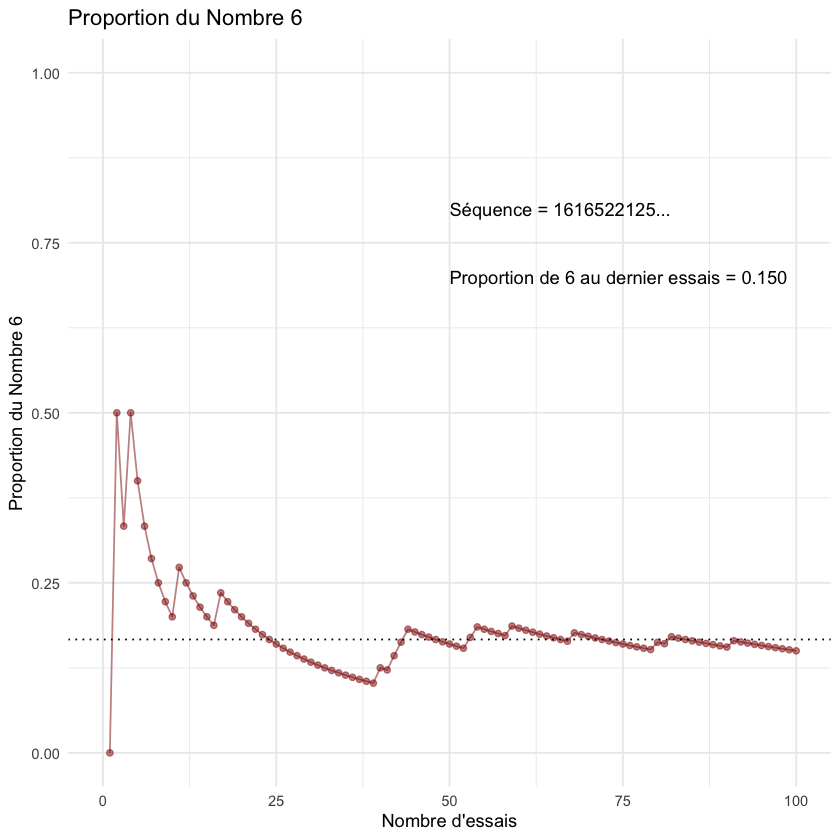

In [9]:
nsamples  = 100                                      # nombre de lancers

lancer   <- sample(c("1", "2", "3", "4","5", "6"), nsamples, replace = TRUE) # générateur de nombres pseudo-aléatoires
prop_six <- cumsum(lancer == "6") / seq_along(lancer)  # calcul de la proportion de fois où le 6 apparaît


# graphique
ggplot(data.frame(x = 1:nsamples, y = prop_six), aes(x, y)) +
  geom_line(color = darkred, alpha = 0.5) +
  geom_point(color = darkred, alpha = 0.5) +
  geom_hline(yintercept = 0.1667, linetype = "dotted") +
  annotate("text", x = nsamples/2, y = 0.8, label = paste0("Séquence = ", paste(lancer[1:10], collapse = ""), "..."), hjust = 0) +
  annotate("text", x = nsamples/2, y = 0.7, label = sprintf("Proportion de 6 au dernier essais = %.3f", prop_six[nsamples]), hjust = 0) +
  ylim(0, 1) +
  xlim(0,nsamples) +
  labs(title = "Proportion du Nombre 6", x = "Nombre d'essais", y = "Proportion du Nombre 6") +
  theme_minimal()


On peut voir sur la figure que, même après un nombre important d'essais, la proportion de "6" est proche de 0.167 mais pas parfaitement égale à 0.167. Cet écart nous rappelle que même avec beaucoup d'essais, un échantillonnage aléatoire est nécessairement fini (et non pas infini), et qu'il n'y a aucune garantie que la fréquence relative d'un événement corresponde à la véritable probabilité sous-jacente de l'événement. C'est pourquoi nous disons que nous *approchons* la probabilité par la fréquence relative à long terme.


### Perspective basée sur la croyance incertaine

Dans la perspective basée sur la croyance incertaine, l'idée est de quantifier l'incertitude concernant notre croyance en un certain état du monde, étant donné certaines données. Si nous reprenons l'exemple du dé, nous pouvons imaginer que nous avons la croyance que le dé n'est pas biaisé, et que la probabilité d'obtenir le "6" est donc de 1/6 = 0.167. La probabilité d'obtenir le "6" peut être notée avec un paramètre labelisé  avec la lettre grecque theta : $\theta =  0.167$ . Le degré de croyance en ce paramètre est noté $p(\theta)$. Nous pouvons imaginer un scénario dans lequel nous croyons fortement que le dé n'est pas biaisé et que la probabilité d'apparition du "6" est 1/6 -- par exemple $p(\theta) = 0.99$, ou un autre scénario dans lequel nous croyons que le dé pourrait être biasé et donc nous avons plus d'incertitude -- par exemple $p(\theta) = 0.5$. 
Dans cette perspective, nous avons donc deux éléments : "la probabilité" et "le degré de croyance".

Ce qui distingue donc cette perspective est le fait de pouvoir exprimer le dégré d'incertitude par rapport à un certain paramètre ($\theta$). Cela peut être défini à travers des fonctions mathématiques qui définissent des courbes qui quantifient le niveau d'incertitude par rapport à un certain paramètre. Ces fonctions mathématiques définissent des distributions de $p(\theta)$, ou la *distribution a priori* de $\theta$. Dans notre exemple, cette distribution quantifie notre degré de croyance par rapport à la probabilité d'obtenir un "6" dans la lancer de dé, avant d'observer les données.

Concrètement, dans cette approche, le paramètre $\theta$ est aussi traité comme une variable aléatoire avec sa propre distribution de probabilité $p(\theta)$.



## Distributions de probabilité

Une distribution de probabilité est simplement une liste de toutes les issues possibles et de leurs probabilités correspondantes. Dans notre exemple du dé, cela est relativement simple : comme il y n'y a que 6 issues possibles (1, 2, 3, 4, 5 ou 6) qui sont équiprobables (1/6).
Nous pouvons déjà illustrer cette distribution de probabilité avec le graphique suivant :

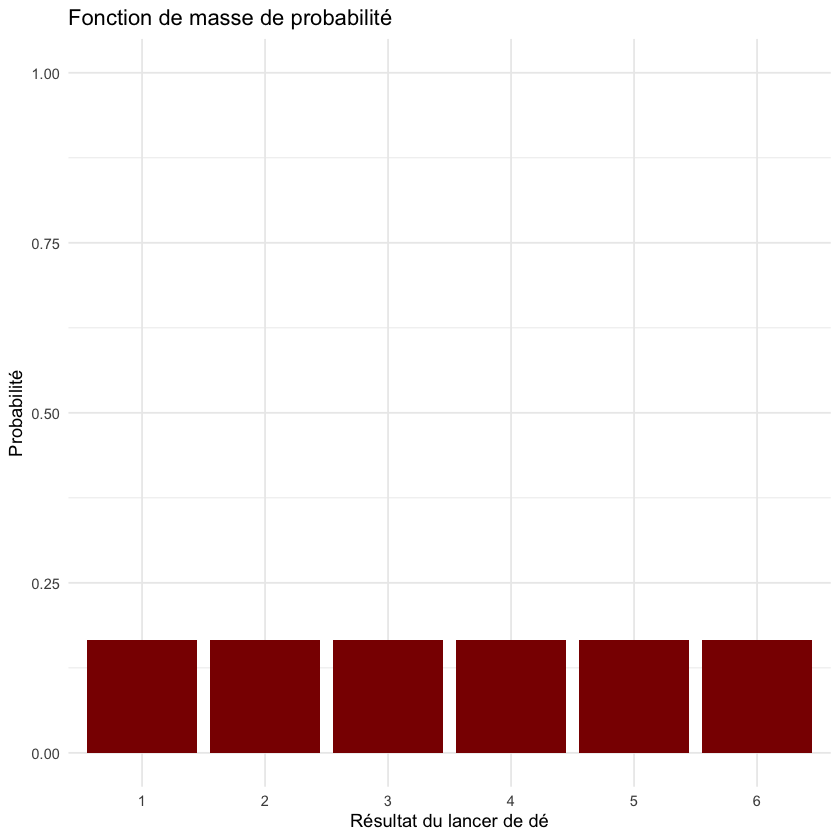

In [3]:
# Créer le dataset avec la liste de toutes les issues possibles et leurs probabilités correspondantes 
die_data <- data.frame(
  outcome     = 1:6,
  probability = rep(1/6, 6)
)

# Créer le graphique de masse de probabilité avec l'échelle de l'axe des y ajustée
ggplot(die_data, aes(x = factor(outcome), y = probability)) +
  geom_bar(stat = "identity", fill = darkred) +
  labs(title = "Fonction de masse de probabilité ",
       x = "Résultat du lancer de dé",
       y = "Probabilité") +
  ylim(0, 1) +
  theme_minimal()

Pour d'autre types de résultats possibles, comme dans la cas de variables aléatoires continues, les choses peuvent se compliquer un peu plus. Pour cela nous allons voir d'abord les distributions de probabilité discrètes et ensuite celles continues.

###  Probabilité discrète

Quand l'univers des possibilités est constitué d'issues discrètes, alors nous pouvons faire référence à la probabilité de chacune des issues possible de manière distincte comme dans notre exemple du dé.

L'exemple du dé est facile à suivre, mais clairement dans la recherche on s'intéresse à des univers de possibilités très différents. Par contre, dans la recherche il y a un grand nombre de cas où on s'intéresse à des possibilités discrètes, comme par exemple la survie à 5 ans après un certain type de traitement médical, ou encore la rechute après un certain type de traitement psychothérapeutique.

Prénons donc ce dernier exemple : imaginons une certaine clinique qui propose un nouveau traitement pour des personnes avec des troubles liés à l'usage de substances. Pour mesurer l'efficacité de ce traitement, on mesure s'il y a eu une rechute dans les 6 mois après le traitement. Nous avons donc une variable aléatoire qui code les issues contenues dans l'univers qui n'admet que *deux issues possibles*, souvent codées comme 1 ou 0 (succès/échec). Le but de la recherche est d'estimer la probabilité, que nous allons appeller $\theta$, d'une rechute. Nous allons coder les deux issues possibles 1 (rechute) ou 0 (pas de rechute).

Dans le cas où nous avons une seule personne ($n = 1$) qui a suivi le traitement dans cette clinique et nous essayons de prédire la probabilité de rechute pour cette personne, notre variable aléatoire va suivre la *loi de Bernoulli* : 

$$X \sim \textit{Be}(\theta) $$  

ou $P(X = 1) = \theta$ \
et $P(X = 0) = 1 - \theta$ 

Hors, si nous devons faire cette prédiction pour plus d'une personne (disons par exemple que 10 personnes ont suivi le traitment dans cette clinique), pour chacune de ces personnes nous allons coder 1 (s'il y a eu une rechute) ou 0 (s'il n'y a pas eu de rechute). Nous avons donc 10 observations indépendantes ($N= 10$). Nous pouvons compter le nombre de rechutes en faisant la somme du nombre de personnes parmi les 10 qui ont eu une rechute. Ici, on est dans le cas d'une variable aléatoire qui somme $N$ expériences de Bernoulli de paramètre $\theta$. Dans ce cas, notre variable aléatoire suit la distribution de la *loi binomiale* :

$$ X \sim \text{Binomial}(N, \theta) $$


Pour mieux comprendre cette distribution, nous imaginons un exemple dans lequel nous avons 20 cliniques différentes qui ont chacune traité 10 personnes avec la même thérapie. Nous allons simuler ce scénario avec `R`, en utilisant la fonction `rbinom` pour créer les données simulées. Dans cette fonction, `n` se réfère au nombre d'échantillons (ou nombre d'observations). Dans notre cas, le nombre d'échantillons correspond au nombre de cliniques. `size` se réfère à la taille de l'échantillon, donc au nombre de personne par clinique qui ont suivi le traitement. `prob` se réfère à la probabilité qu'il y ait une rechute, c'est-à-dire notre paramètre $\theta$.

Voici la commande `R` qui calcule combien de personnes qui ont suivi le traitment ont eu une rechute, si la probabilité est de 0.5 :

In [4]:
rbinom(n = 20, size = 10, prob = 0.5)

[1] 1 5 2 4 7 2 8 5 6 5 9 4 1 4 2 3 5 3 6 6

Chaque valeur indique le nombre de personnes (sur 10) qui ont eu une rechute dans chacune des 20 cliniques sous une probabilité de rechute de 0.5. 
Autrement dit, c'est le nombre de rechutes pour chacune de 20 observations simulées générées par une variable aléatoire discrète $X$ avec une distribution de probabilité $p(x|\theta)$ appelée distribution binomiale.

Pour une variable aléatoire discrète, cette distribution s'appelle fonction de masse de probabilité ou **Probability Mass Function** (*PMF*).

Comme nous l'avons vu dans l'exemple du dé, cette fonction définit la probabilité de chacune des issues possibles. Dans le cas de notre traitement il y a 10 patients, donc les possibilités sont au nombre de 11 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ou 10 personnes qui ont une rechute).

Nous pouvons plus concrètement créer le graphique de cette fonction de probabilité de masse comme suit. Vous pouvez essayer de changer la valeur de `theta` pour voir les effets que cela a sur la distribution :



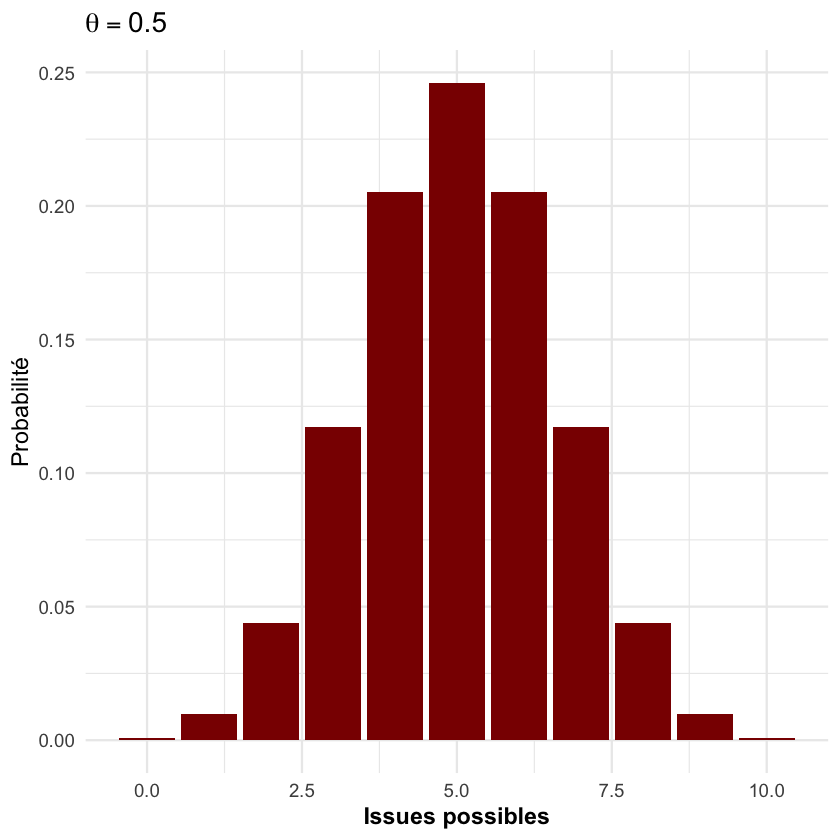

In [5]:
theta = 0.5

data <- data.frame(x = 0:10, y = dbinom(0:10, size = 10, prob = theta))

ggplot(data, aes(x, y)) +
  geom_bar(stat = "identity", fill = darkred ) +
  labs(x = "Issues possibles", y = "Probabilité") +
  theme_minimal(base_size = 14) +
  theme(
    axis.title.x = element_text(face = "bold"),
    plot.title = element_text(face = "bold")
  ) +
  ggtitle(bquote(theta == bold(.(theta))))



*** WORK IN PROGRESS

We can even calculate the probabilité of k people having a relapse using this

$P(X = k) = \binom{n}{k} \theta^k (1 - \theta)^{n - k}$


###  Probabilité continue

## Probabilité conditionnelle